In [1]:
import numpy as np
import matplotlib.pyplot as plt

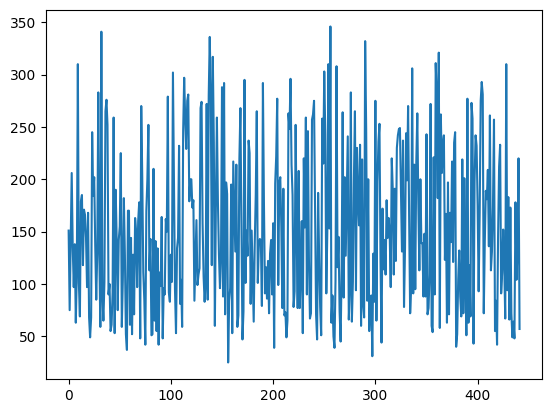

In [17]:
import pandas as pd
from sklearn.datasets import load_diabetes

data = load_diabetes()
X,y = data['data'], data['target']

plt.plot(np.arange(y.shape[0]), y)
plt.show()

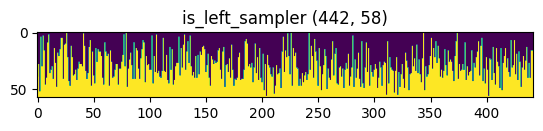

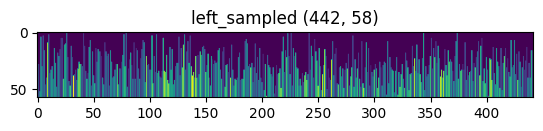

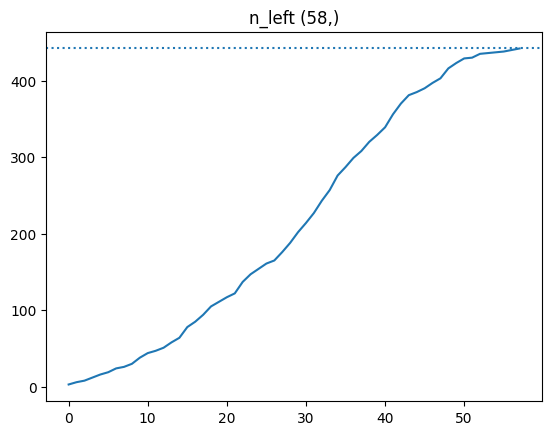

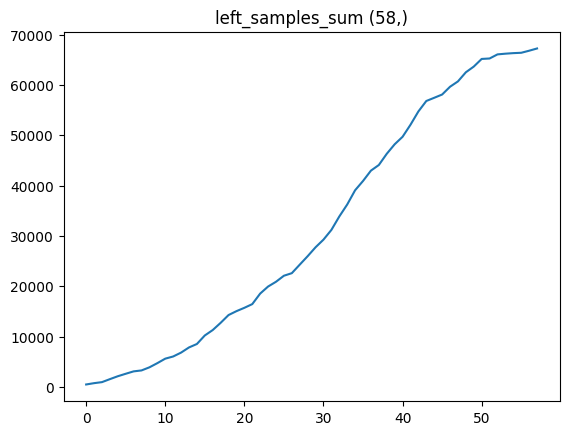

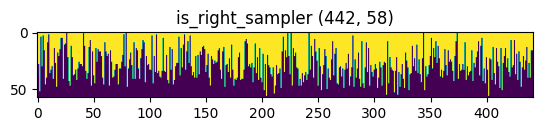

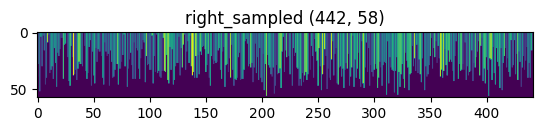

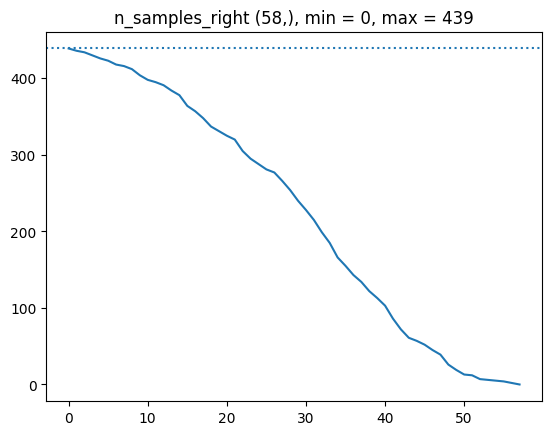

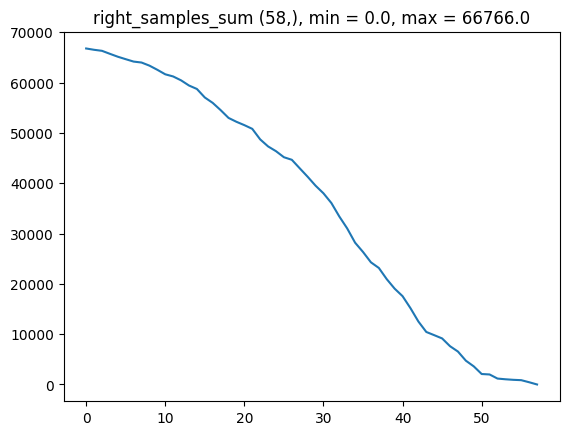

In [79]:
thresh = np.unique(X[:,0]).reshape(1,-1)
selected_feat = X[:,0].reshape(-1,1)
is_left_sampler = (selected_feat <= thresh)
is_right_sampler = ~(is_left_sampler)
stacked_targets = np.hstack([y.reshape(-1,1)] * is_left_sampler.shape[1])
left_sampled = is_left_sampler * stacked_targets
right_sampled = is_right_sampler * stacked_targets

n_samples_left = np.sum(is_left_sampler, axis=0)
n_samples_right = np.sum(is_right_sampler, axis=0)

left_samples_sum = np.sum(left_sampled, axis=0)
right_samples_sum = np.sum(right_sampled, axis=0)

# Plot for left
plt.imshow(is_left_sampler.T)
plt.title(f'is_left_sampler {is_left_sampler.shape}')
plt.show()

plt.imshow(left_sampled.T)
plt.title(f'left_sampled {left_sampled.shape}')
plt.show()

plt.plot(np.arange(n_samples_left.shape[0]), n_samples_left)
plt.axhline(np.max(n_samples_left), linestyle='dotted')
plt.title(f'n_left {n_samples_left.shape}')
plt.show()

plt.plot(np.arange(left_samples_sum.shape[0]), left_samples_sum)
plt.title(f'left_samples_sum {left_samples_sum.shape}')
plt.show()

# Plot for right
plt.imshow(is_right_sampler.T)
plt.title(f'is_right_sampler {is_right_sampler.shape}')
plt.show()
plt.imshow(right_sampled.T)
plt.title(f'right_sampled {right_sampled.shape}')
plt.show()
plt.plot(np.arange(n_samples_right.shape[0]), n_samples_right)
plt.axhline(np.max(n_samples_right), linestyle='dotted')
plt.title(f'n_samples_right {n_samples_right.shape}, min = {np.min(n_samples_right)}, max = {np.max(n_samples_right)}')
plt.show()

plt.plot(np.arange(right_samples_sum.shape[0]), right_samples_sum)
plt.title(f'right_samples_sum {right_samples_sum.shape}, min = {np.min(right_samples_sum)}, max = {np.max(right_samples_sum)}')
plt.show()


$
\begin{bmatrix}
x_1 \\
x_2 \\
x_3 \\
\end{bmatrix}^{T}
\cdot
\begin{bmatrix}
i_{11} i_{12} i_{13} \\
i_{21} i_{22} i_{23} \\
i_{31} i_{32} i_{33} \\
\end{bmatrix}
$

$
\begin{bmatrix}
x_1
x_2
x_3 
\end{bmatrix}
\cdot
\begin{bmatrix}
i_{11} i_{12} i_{13} \\
i_{21} i_{22} i_{23} \\
i_{31} i_{32} i_{33} \\
\end{bmatrix}
$

In [18]:
X.shape

(442, 10)

In [2]:
# Create a function that returns left and right indicators
